In [1]:
import pandas as pd
import numpy as np
import copy as cp
import matplotlib.pyplot as plt
import seaborn as sns
import os
from natsort import natsorted, ns

In [2]:
"""
A script to evaulate an experiment and create plots accoringly. 

"""

'\nA script to evaulate an experiment and create plots accoringly. \n\n'

In [8]:
#set experiment folder as root dir of this script
experiment_folder = "./data/only_rotate/"
os.chdir(experiment_folder)

FileNotFoundError: [Errno 2] No such file or directory: './data/only_rotate/'

In [9]:
#set hyperparameters 
num_generations = 100
population_size = 100
num_runs = 1


    

In [10]:
df = pd.DataFrame()
generation_identifiers = {}

for run in sorted(os.listdir(".")):
    if run[0].isdigit():
        #only use the run dirs 
        for filename in natsorted(os.listdir("./"+run+"/generations")):
            _generation_ids = pd.read_csv("./"+run+"/generations/"+filename+"/identifiers.txt", header=None)
            _generation_ids.rename({0: filename}, axis=1, inplace=True)
            if not f"{run}" in generation_identifiers:
                generation_identifiers[f"{run}"] = []
            generation_identifiers[f"{run}"].append(_generation_ids)

In [11]:
#contains the information about the phenotype ID of each generation
generation_identifiers['1'][0].head(3)

,generation_0
0,1
1,2
2,3


In [12]:
runs = {}
for run in range(1, num_runs+1):
    # cause run starts with 1 
    df = pd.DataFrame()
    for generation in range(num_generations):
        df = df.append(generation_identifiers[f"{run}"][generation][f"generation_{generation}"])
    runs[f"{run}"] = df

In [13]:
fitness_values = {}

for run in range(1, num_runs+1):
    fitness_values[f"{run}"] = pd.read_csv(f"{run}/data_fullevolution/fitness.csv", header=None)
    fitness_values[f"{run}"].rename({0:"Individual_ID", 1:"Distance to Target"}, axis=1, inplace=True)

In [14]:
# no exchange the phenotype ID with the fitness value 
fitness_df = pd.DataFrame()
for _run in runs:
    run_df = runs[_run]
    _fitness_df = cp.deepcopy(run_df.T)
    for gen in run_df.T:
        for index in range(len(run_df.T)):
            individual = int((_fitness_df[gen][int(index)]))
            fitness_value = fitness_values[str(_run)].T[(individual)]['Distance to Target']
            _fitness_df[gen][index] = fitness_value
            
    cur_run = np.ndarray(shape=(len(_fitness_df)))
    cur_run.fill(int(_run))
    _fitness_df['run'] = cur_run

    fitness_df = fitness_df.append(_fitness_df)

In [15]:
mean_dic = {}
std_dic = {}
min_dic = {}
max_dic = {}
result_df = pd.DataFrame()
for run in range(num_runs):
    _result_df = pd.DataFrame()
    for gen in fitness_df:
        if gen != 'run':
            mean_dic[gen] = fitness_df[gen][run*population_size].mean()
            std_dic[gen] = fitness_df[gen].std()
            min_dic[gen] = fitness_df[gen].min()
            max_dic[gen] = fitness_df[gen].max()

        
    
    mean_df = pd.DataFrame(mean_dic, index=[0]).rename({0:"mean"})
    std_df =  pd.DataFrame(std_dic, index=[0]).rename({0:"std"})
    min_df =  pd.DataFrame(min_dic, index=[0]).rename({0:"min"})
    max_df =  pd.DataFrame(max_dic, index=[0]).rename({0:"max"})
    _result_df = mean_df.append(std_df).append(min_df).append(max_df).T
    _result_df['run'] = run+1
    result_df = result_df.append(_result_df)

In [16]:
result_df

,mean,std,min,max,run
generation_0,0.177565,4.032243,0.023504,16.083988,1
generation_1,1.137166,4.073159,0.023504,16.083988,1
generation_2,3.758880,4.288919,0.023504,23.253435,1
generation_3,6.568982,4.216727,0.023504,23.253435,1
generation_4,5.617637,4.180952,0.023504,23.253435,1
...,...,...,...,...,...
generation_95,132.989345,92.096583,0.006157,225.999826,1
generation_96,118.986998,91.320920,0.030018,226.970216,1
generation_97,208.956695,91.198246,0.022578,226.970216,1
generation_98,223.331427,91.990286,0.022578,226.970216,1


In [17]:
result_df = result_df.set_axis([i for i in range(len(result_df))])

In [18]:
result_df.index.name = 'generations'

In [19]:
result_df

,mean,std,min,max,run
generations,,,,,
0,0.177565,4.032243,0.023504,16.083988,1
1,1.137166,4.073159,0.023504,16.083988,1
2,3.758880,4.288919,0.023504,23.253435,1
3,6.568982,4.216727,0.023504,23.253435,1
4,5.617637,4.180952,0.023504,23.253435,1
...,...,...,...,...,...
95,132.989345,92.096583,0.006157,225.999826,1
96,118.986998,91.320920,0.030018,226.970216,1
97,208.956695,91.198246,0.022578,226.970216,1


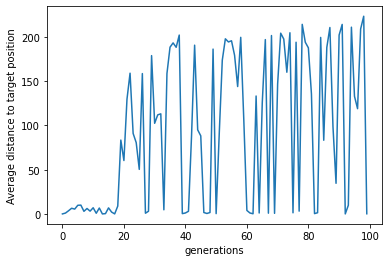

In [20]:
ax = sns.lineplot(x=result_df.T.columns, y=result_df['mean'], markers=True, dashes=True)
ax.set(ylabel='Average distance to target position')
sns.set(rc={'figure.figsize':(15,9)})
ax.figure.savefig("output.png")
plt.show()

In [21]:
result_df.head(2)

,mean,std,min,max,run
generations,,,,,
0,0.177565,4.032243,0.023504,16.083988,1
1,1.137166,4.073159,0.023504,16.083988,1


In [22]:
fitness_df['generation_4'].sort_values(ascending=False)

65    23.253435
9     13.934956
51    13.598255
19    12.621812
64    12.205789
        ...    
95     0.167363
59     0.140927
11     0.110447
32     0.067974
97     0.023504
Name: generation_4, Length: 100, dtype: float64

In [23]:
fitness_df['generation_4'][11]

0.1104471858671278

<AxesSubplot:xlabel='generations', ylabel='mean'>

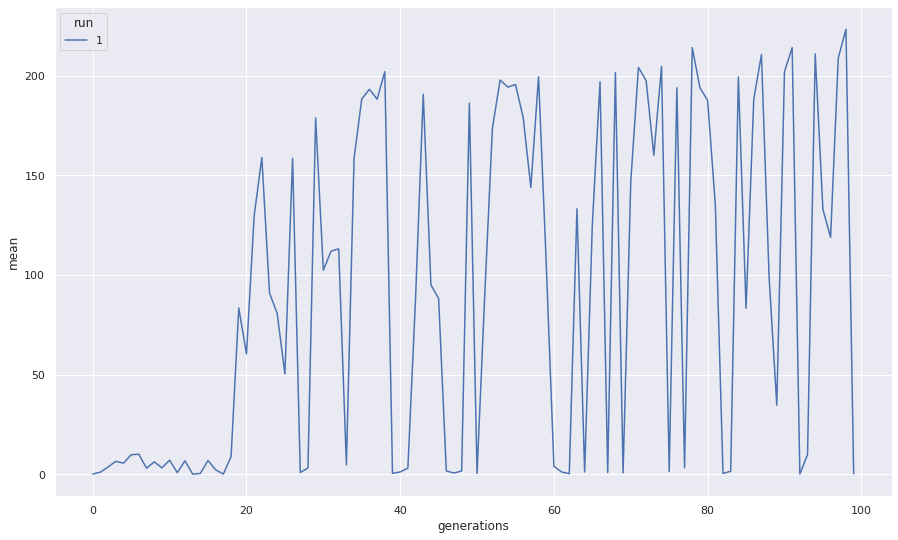

In [24]:
sns.lineplot(data=result_df, x='generations', y='mean', hue='run')

In [25]:
formated_fitness_df = cp.deepcopy(fitness_df)
formated_fitness_df.set_axis([i for i in range(len(fitness_df.T))], axis=1, inplace=True)
formated_fitness_df.rename(columns={len(fitness_df.T)-1 : 'run'}, inplace=True)
formated_fitness_df

,0,1,2,3,4,5,6,7,8,9,...,91,92,93,94,95,96,97,98,99,run
0,0.177565,1.137166,3.758880,6.568982,5.617637,9.918378,10.102313,3.109004,6.299310,3.311060,...,214.096021,0.174840,9.945686,210.982901,132.989345,118.986998,208.956695,223.331427,0.347211,1.0
1,4.151559,0.639470,0.342769,6.048109,5.339631,4.379979,0.407676,12.169678,0.886717,0.545788,...,0.523406,1.020852,1.849377,166.252288,149.063304,34.726558,34.726558,2.494110,34.726558,1.0
2,13.934956,6.360280,7.338568,5.864879,0.358564,4.380194,0.493819,2.523653,8.936711,5.106343,...,221.335480,0.877849,0.174840,28.268552,1.146795,225.999826,217.898326,157.591055,3.177510,1.0
3,7.544362,0.342769,5.564557,2.638562,1.968565,0.029863,3.448842,4.830760,0.493819,6.826017,...,0.133242,179.458562,156.259410,3.772396,141.672935,3.772396,1.020852,0.833292,161.720346,1.0
4,6.600404,2.325571,1.350061,7.355613,0.521075,3.118731,6.467223,1.541237,7.414760,4.993651,...,0.702373,0.127895,218.849910,6.528822,95.932615,2.741234,223.331427,218.036970,0.022578,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
95,3.162069,0.869338,0.174147,3.252862,0.167363,0.493819,23.253435,0.811341,7.700323,0.917152,...,9.485068,17.682009,190.394361,0.877849,0.389835,218.849910,59.615294,131.884507,3.473799,1.0
96,3.059991,4.890854,0.593959,0.506545,4.956016,4.137585,2.111504,5.349404,5.781289,1.160055,...,166.252288,0.328981,92.489937,0.750187,100.561630,3.066408,209.895731,100.561630,218.627239,1.0
97,3.080959,6.604915,1.233499,5.617637,0.023504,2.491065,2.432751,6.691268,2.845041,11.646778,...,2.731703,0.259986,0.813455,92.489937,219.276443,212.380522,1.185078,208.766943,197.868771,1.0
98,5.313608,11.725933,13.702206,12.621812,4.099565,8.595984,3.252862,4.993651,5.106343,2.970879,...,0.673389,218.260195,101.341780,197.868771,0.877849,5.782283,141.275257,5.183557,225.593360,1.0


In [26]:
melted_formated_fitness = formated_fitness_df.melt(id_vars='run')
melted_formated_fitness.rename(columns={'variable':'generation', 'value':'fitness'}, inplace=True)
melted_formated_fitness.head(3)

,run,generation,fitness
0,1.0,0,0.177565
1,1.0,0,4.151559
2,1.0,0,13.934956


In [32]:
melted_formated_fitn

,run,generation,fitness
0,1.0,0,0.177565
1,1.0,0,4.151559
2,1.0,0,13.934956
3,1.0,0,7.544362
4,1.0,0,6.600404
...,...,...,...
9995,1.0,99,3.473799
9996,1.0,99,218.627239
9997,1.0,99,197.868771
9998,1.0,99,225.593360


<AxesSubplot:xlabel='generation', ylabel='fitness'>

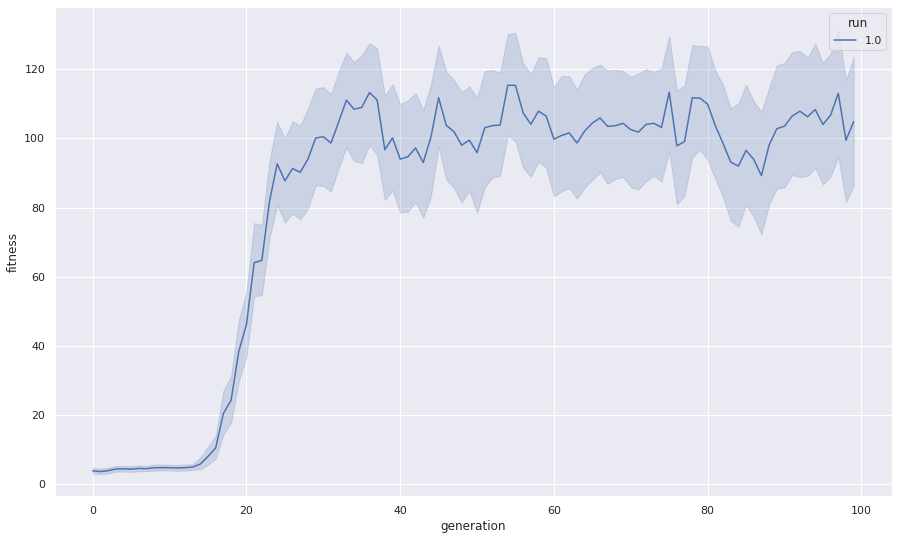

In [27]:
sns.lineplot(data=melted_formated_fitness, x='generation', hue='run', y='fitness')

In [28]:
# TODO: create boxplots over individual performance

In [29]:
fitness_mean = []
fitness_std = []
for i, val in enumerate(generation_identifiers):
    merged_gen = pd.merge(
        left=val,
        right=fitness_run_1,
        how="inner",
        on=None,
        left_on="generation_"+str(i),
        right_on="Individual_ID",
        left_index=False,
        right_index=False,
        sort=True,
        suffixes=("_x", "_y"),
        copy=True,
        indicator=False,
        validate=None,
    )
    gen_mean = merged_gen["Distance to Target"].mean()  
    gen_std = merged_gen["Distance to Target"].std()
    fitness_mean.append(gen_mean)
    fitness_std.append(gen_mean)

NameError: name 'fitness_run_1' is not defined

In [30]:
import matplotlib.pyplot as plt

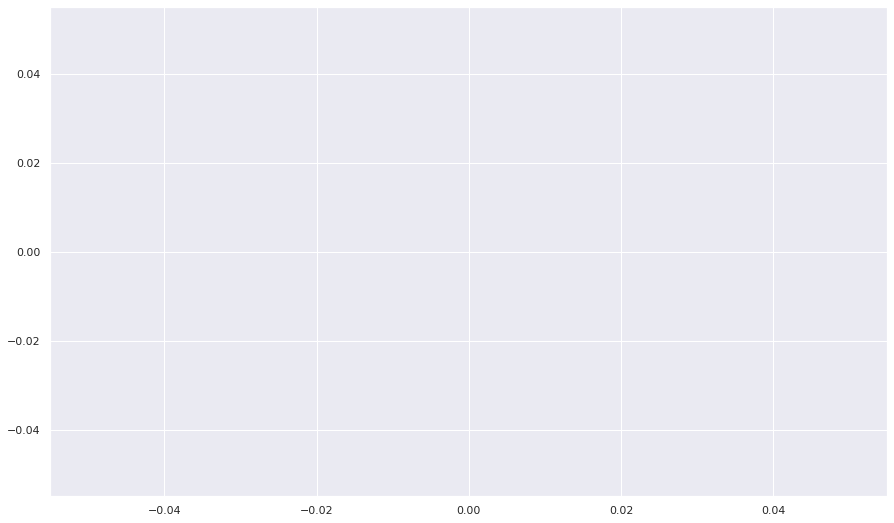

In [31]:
plt.errorbar(list(range(1,len(fitness_mean)+1)), fitness_mean, fitness_std,linestyle='None', marker='^')
plt.show()

In [692]:
max((result_df['max']))

-19.270146693442285

Individual_ID         41.00000
Distance to Target   -19.07879
Name: 40, dtype: float64

,Individual_ID,Distance to Target
40,41.0,-19.078790
40,41.0,-20.099967
40,41.0,-20.092420


In [750]:
run_1_best = fitness_run_1.T[40]
run_2_best = fitness_run_2.T[40]
run_3_best = fitness_run_3.T[40]


In [753]:
run_1_best['run'] = 1
run_2_best['run'] = 2
run_3_best['run'] = 3

In [754]:
best_pheno_df = pd.DataFrame(run_1_best).T.append(run_2_best).append(run_3_best)

In [784]:
best_pheno_df = best_pheno_df.reset_index(drop=True)

In [760]:
best = best_pheno_df['Distance to Target'].mean()
std = best_pheno_df['Distance to Target'].std()

In [785]:
fit = best_pheno_df['Distance to Target']
fit

0   -19.078790
1   -20.099967
2   -20.092420
Name: Distance to Target, dtype: float64

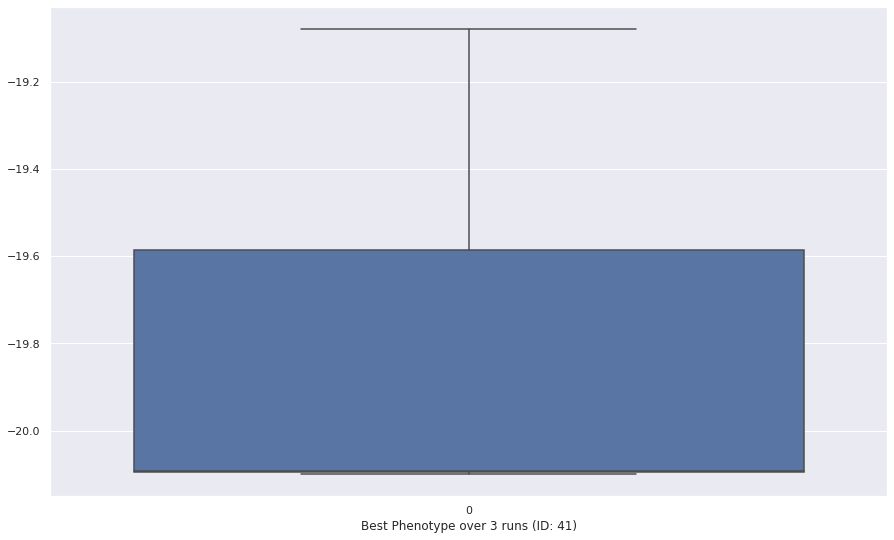

In [807]:
ax = sns.boxplot(data=best_pheno_df['Distance to Target'])
ax.set(xlabel='Best Phenotype over 3 runs (ID: 41)')
ax.figure.savefig('best_phenotype_41.png')